# Анализ данных и проверка гипотез, которые могут помочь вырасти сервису аренды самокатов GoFast

В нашем распоряжении данные о некоторых пользователях сервиса аренды самокатов GoFast из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки - 6 рублей;
  - стоимость старта - бесплатно.


В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — `users_go.csv`

|                   |                                        |
|-------------------|----------------------------------------|
| user_id           | уникальный идентификатор пользователя  |
| name              | имя пользователя                       |
| age               | возраст                                |
| city              | город                                  |
| subscription_type | тип подписки (free, ultra)             |

Поездки — `rides_go.csv`

|          |                                                                                                                                                                  |
|----------------------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| user_id  | уникальный идентификатор пользователя                                                                                                                            |
| distance | расстояние, которое пользователь проехал в текущей сессии (в метрах)                                                                                             |
| duration | продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»  |
| date     | дата совершения поездки                                                                                                                                          |

Подписки — `subscriptions_go.csv`

|                   |                                                    |
|-------------------|----------------------------------------------------|
| subscription_type | тип подписки                                       |
| minute_price      | стоимость одной минуты поездки по данной подписке  |
| start_ride_price  | стоимость начала поездки                           |
| subscription_fee  | стоимость ежемесячного платежа                     |


## Шаг. Загрузка данных

### Загрузка и изучение данных по пользователям

In [1]:
import pandas as pd #импортируем библиотеку pandas

In [2]:
import matplotlib.pyplot as plt #импорт библиотеки Matplotlib с модулем Pyplot

In [3]:
from math import sqrt #импорт только функции sqrt() из модуля math в Python

In [4]:
import seaborn as sns #импорт библиотеки Seaborn

In [5]:
import scipy.stats as st #импорт модуля scipy.stats

In [6]:
from scipy.stats import binom,norm #импорт объектов binom и norm из модуля stats библиотеки scipy

In [7]:
import numpy as np #импорт библиотеки NumPy

In [8]:
#считаем csv - файл с данными о пользователях
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

#выведем на экран первые 10 строк
data_users.head(10)   

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [9]:
data_users.info() #выведем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### Загрузка и изучение данных по поездкам

In [10]:
#считаем csv - файл с данными о поездках
try:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net//datasets/rides_go.csv')

#выведем на экран первые 10 строк
data_rides.head(10)   

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [11]:
data_rides.info() #выведем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


### Загрузка и изучение данных по подпискам

In [12]:
#считаем csv - файл с данными о подписках
try:
    data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

#выведем на экран первые 5 строк
data_sub.head()   

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [13]:
data_sub.info() #выведем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<div style="border:solid green 2px; padding: 20px">
Вывод: на первом этапе были открыты файлы с данными, были выведены первые строки датафреймов. Вполне понятно, что делать какие-либо первоначальные выводы на основании данной информации невозможно, а данные необходимо подвергнуть предобработке. Но уже можно отметить, что по предварительным данным пропуски отсутствуют.

## Шаг. Предобработка данных

### Приведение столбца `date` к типу даты pandas

In [14]:
#измененим формат данных в столбце `date`
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

### Создание нового столбца с номером месяца на основе столбца `date`

In [15]:
#создадим новый столбец `month`
data_rides['month'] = data_rides['date'].dt.month

In [16]:
#проверим данные о годах в составе датафрейма `data_rides`
print(data_rides['date'].dt.year.unique())

[2021]


Соответственно, делается вывод, что все данные представлены на 2021 год

In [17]:
data_rides.head() #выводим на экран первые пять строк `data_rides`

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [18]:
#выведем количество значений по месяцам
data_rides['month'].value_counts()

month
1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: count, dtype: int64

Данные о распределении, конечно, смущают. Особенно в январе. Но предположим, что снега не было. Обычно сезон самокатов начинается в конце марта и заканчивается в районе ноября.

### Проверка наличия пропущенных значений и дубликатов в датафреймах

In [19]:
data_users.isna().sum() #проверка пропусков в `data_users`

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [20]:
data_users['user_id'].sort_values().unique() #проверим уникальные значения столбца `users_id` 

array([   1,    2,    3, ..., 1532, 1533, 1534], dtype=int64)

Вполне возможно, что есть дубликаты в датафрейме.

In [21]:
data_users.duplicated().sum() #подсчитаем количество дубликатов в датафрейме `data_users`

31

In [22]:
data_users = data_users.drop_duplicates()  #удалим дубликаты из data_users

Действительно, уникальных значений в столбце `users_id` было как раз 1534 шт. А остальные строки в изначальной таблице были дубликатами.

In [23]:
data_users['name'].sort_values().unique() #выведем перечень данных столбца `name` в алфавитном порядке

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

Предполагается, что имя Наташа - это отдельный пользователь, а не юзер который зарегистрировался еще раз под коротким именем.

In [24]:
data_users['age'].sort_values().unique() #выведем перечень данных столбца `age`

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43], dtype=int64)

Удалять ничего не будем, но если речь идет об аренде электросамокатов, то аренда электросамоката до 18 лет запрещена. Сервису стоит обратить внимание на этот момент.

In [25]:
data_users['city'].sort_values().unique() #выведем перечень данных столбца `city` в алфавитном порядке

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [26]:
#выведем перечень данных столбца `subscription_type` в алфавитном порядке
data_users['subscription_type'].sort_values().unique() 

array(['free', 'ultra'], dtype=object)

In [27]:
data_rides.isna().sum() #проверка пропусков в `data_rides`

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [28]:
data_rides['user_id'].sort_values().unique() #проверим уникальные значения столбца `users_id` 

array([   1,    2,    3, ..., 1532, 1533, 1534], dtype=int64)

In [29]:
data_rides['distance'].sort_values().unique() #проверим уникальные значения столбца `distance` 

array([8.55682926e-01, 2.57078689e+00, 4.32950578e+00, ...,
       6.90849134e+03, 7.06600377e+03, 7.21100774e+03])

In [30]:
data_rides['duration'].sort_values().unique() #проверим уникальные значения столбца `duration` 

array([ 0.5       ,  2.03563247,  2.05325125, ..., 39.52660212,
       39.87385602, 40.82396262])

In [31]:
data_rides.duplicated().sum() #подсчитаем количество дубликатов в датафрейме `data_rides`

0

<div style="border:solid green 2px; padding: 20px">
Вывод: на втором этапе данные в столбце `date` были приведены к формату pandas для дальнейшей работы, был добавлен новый столбец в таблицу `data_rides` (`month`). Также были проанализированы данные датафреймов, удалены дубликаты в `data_users`.

## Шаг. Исследовательский анализ данных

На данном этапе опишем и визуализируем общую информацию о пользователях и поездках.

### Частота встречаемости городов

In [32]:
#создадим сводную таблицу по количеству значений по каждому городу
city_data = data_users.pivot_table(index='city', values = 'user_id', aggfunc=['count'])

#переименуем столбец
city_data.columns = ['count']   

#выведем таблицу
city_data.sort_values(by = 'count',ascending = False)

,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


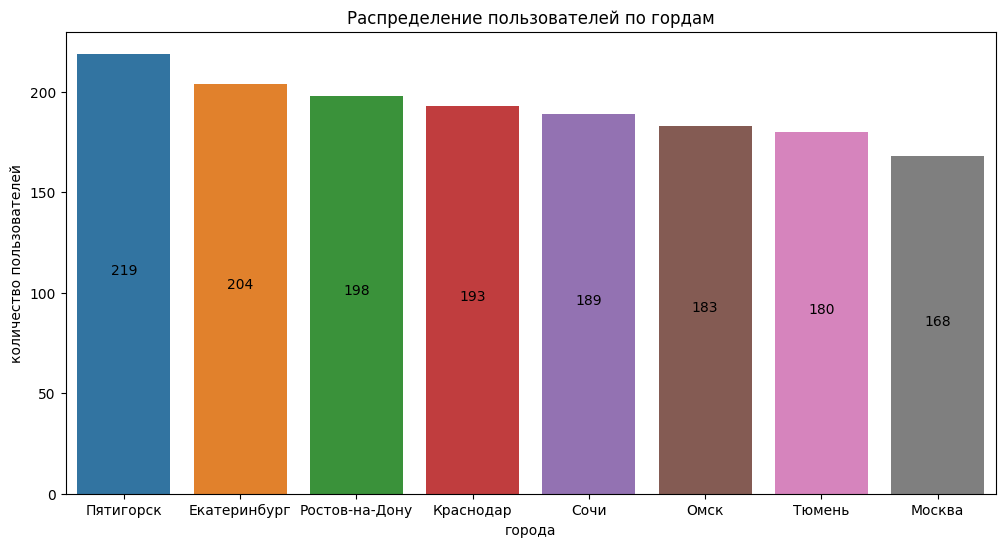

In [33]:
#задаем размер графика
plt.figure(figsize=(12, 6))

#создаем график
sns.countplot(x='city', data=data_users, order=data_users['city'].value_counts().index)

#прописываем значения на графике
for i, (city, value) in enumerate(data_users['city'].value_counts().items()):
    plt.text(i,value//2, value, ha = 'center')
plt.title('Распределение пользователей по гордам')
plt.xlabel('города')
plt.ylabel('количество пользователей');

### Cоотношение пользователей с подпиской и без подписки

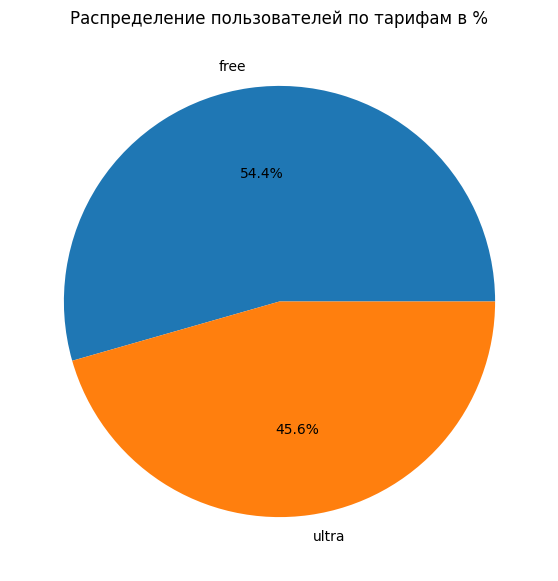

In [34]:
plt.figure(figsize=(7, 7))
data_users['subscription_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.title('Распределение пользователей по тарифам в %');

In [35]:
#создадим сводную таблицу по количеству значений по каждому значению `subscription_type`
pivot_table = data_users.pivot_table(index='subscription_type', values = 'user_id', aggfunc=['count'])

#переименуем столбец
pivot_table.columns = ['count']   

#выведем таблицу
pivot_table.sort_values(by = 'count',ascending = False)

,count
subscription_type,
free,835
ultra,699


### Возраст пользователей

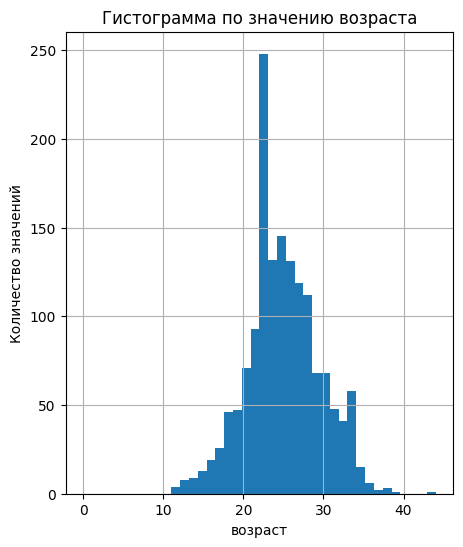

In [36]:
data_users['age'].hist(bins = 40,range=(0,44),figsize=(5, 6)) #построим гистограмму по значениям `age`
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению возраста')
plt.xlabel('возраст');

In [37]:
#создадим сводную таблицу по количеству значений по каждому значению `age`
pivot_table = data_users.pivot_table(index='age', values = 'user_id', aggfunc=['count'])

#переименуем столбец
pivot_table.columns = ['count']   

#выведем таблицу
pivot_table.sort_values(by = 'count',ascending = False)

,count
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


### Расстояние, которое пользователь преодолел за одну поездку

In [38]:
data_rides['distance'].describe() #получим описание значений столбца `distance`

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

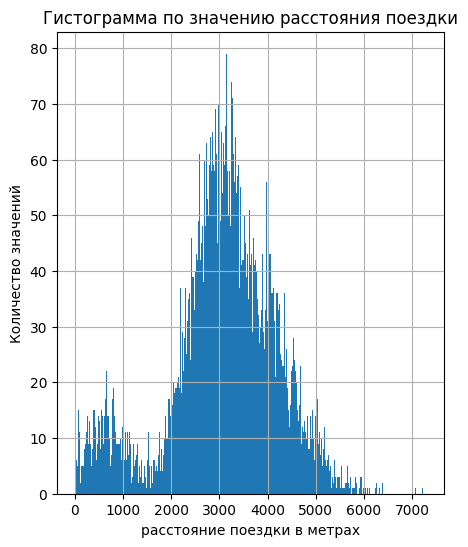

In [39]:
data_rides['distance'].hist(bins = 1000,range=(0,7300),figsize=(5, 6)) #построим гистограмму по значениям `distance`
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению расстояния поездки')
plt.xlabel('расстояние поездки в метрах');

Два пиковых значения на распределении можно объяснить наличием интереса у пользователей интереса к двум категориям поездок (на близкое расстояние - около 500 метров и на более длинное расстояние - около 3 км)

In [40]:
#выведем отсортированную таблицу
data_rides.sort_values(by = 'distance',ascending = False).head()

,user_id,distance,duration,date,month
16309,1411,7211.007745,0.500000,2021-04-15,4
16484,1422,7066.003772,23.619318,2021-02-12,2
15580,1361,6908.491343,23.816983,2021-03-27,3
17171,1471,6760.940067,32.043760,2021-08-03,8
17242,1477,6724.932981,0.500000,2021-01-12,1


In [41]:
#выведем отсортированную таблицу
data_rides.sort_values(by = 'distance',ascending = False).head()

,user_id,distance,duration,date,month
16309,1411,7211.007745,0.500000,2021-04-15,4
16484,1422,7066.003772,23.619318,2021-02-12,2
15580,1361,6908.491343,23.816983,2021-03-27,3
17171,1471,6760.940067,32.043760,2021-08-03,8
17242,1477,6724.932981,0.500000,2021-01-12,1


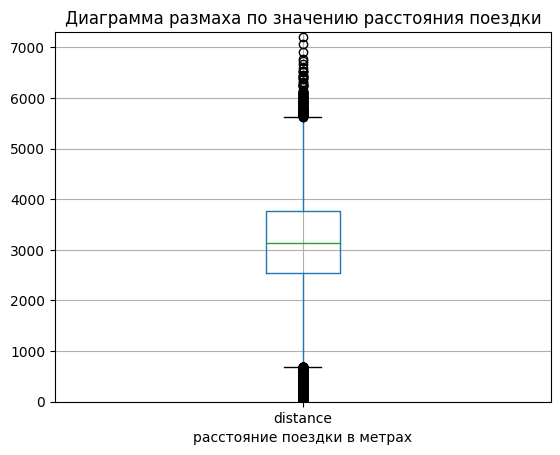

In [42]:
#построим диаграмму размаха
plt.ylim(0, 7300)
data_rides.boxplot('distance')
plt.title('Диаграмма размаха по значению расстояния поездки')
plt.xlabel('расстояние поездки в метрах');

### Продолжительность поездок

In [43]:
data_rides['duration'].describe() #получим описание значений столбца `duration`

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [44]:
#проверим данные с поездками в 30 секунд
data_rides_more_30 = data_rides.query('duration==0.5').sort_values(by = 'distance',ascending = False)
display(data_rides_more_30.head(20))
print('Количество строк:',data_rides_more_30.shape[0])

,user_id,distance,duration,date,month
16309,1411,7211.007745,0.5,2021-04-15,4
17242,1477,6724.932981,0.5,2021-01-12,1
11385,1057,6601.197575,0.5,2021-02-07,2
13701,1224,6414.516026,0.5,2021-07-15,7
14574,1285,6316.574814,0.5,2021-09-25,9
7830,795,6262.302747,0.5,2021-09-09,9
6860,724,6225.520342,0.5,2021-12-16,12
14178,1257,6120.067697,0.5,2021-03-16,3
7612,780,6112.644835,0.5,2021-11-23,11
9622,931,6002.236438,0.5,2021-11-10,11


Количество строк: 95


Добавим в датафрейм `data_rides` данные о скорости.

In [45]:
data_rides['speed_km_in_hour'] = data_rides['distance']*60/data_rides['duration']/1000 #добавляем данные о скорости км в час

In [46]:
data_rides['speed_km_in_hour'].describe() #получим описание столбца `speed_km_in_hour`

count    18068.000000
mean        13.785261
std         44.156189
min          0.005133
25%          8.127843
50%         10.251135
75%         12.929800
max        865.320929
Name: speed_km_in_hour, dtype: float64

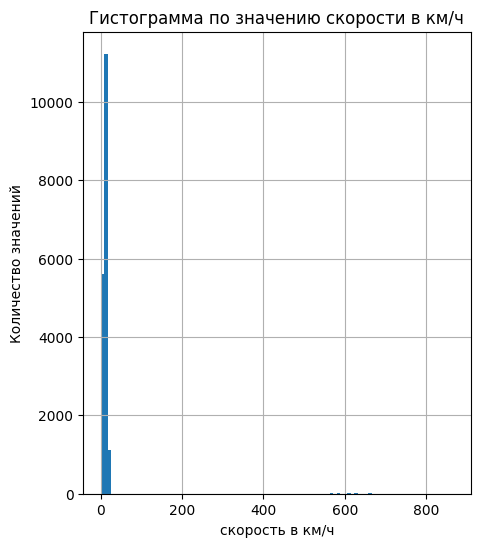

In [47]:
data_rides['speed_km_in_hour'].hist(bins = 100,range=(0,866),figsize=(5, 6)) #построим гистограмму по значениям `duration`
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению скорости в км/ч')
plt.xlabel('скорость в км/ч');

Логично, что большинство значений лежит в малом диапазоне.

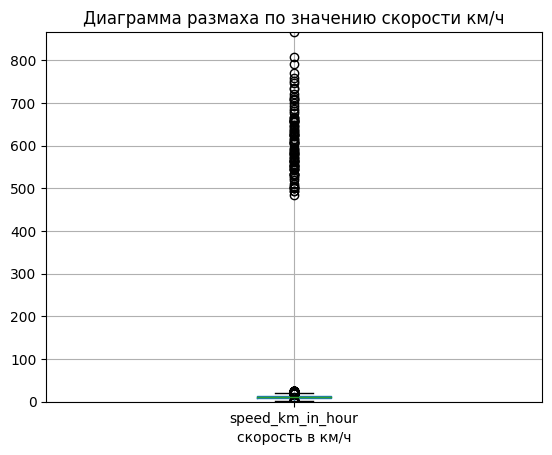

In [48]:
#построим диаграмму размаха
plt.ylim(0, 866)
data_rides.boxplot('speed_km_in_hour')
plt.title('Диаграмма размаха по значению скорости км/ч')
plt.xlabel('скорость в км/ч');

Изменим параметры диаграммы размаха.

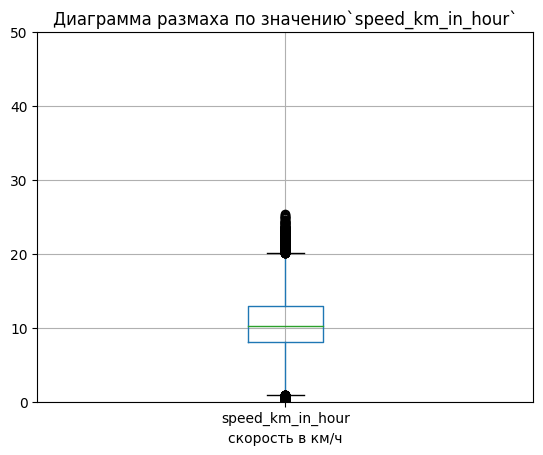

In [49]:
#построим диаграмму размаха
plt.ylim(0, 50)
data_rides.boxplot('speed_km_in_hour')
plt.title('Диаграмма размаха по значению`speed_km_in_hour`')
plt.xlabel('скорость в км/ч');

Проверим данные со скоростью выше 30 км/час. Все они выглядят достаточно странно.

In [50]:
display(data_rides.query('speed_km_in_hour>30'))

,user_id,distance,duration,date,month,speed_km_in_hour
6531,701,4196.445201,0.5,2021-08-31,8,503.573424
6570,704,4830.824371,0.5,2021-10-14,10,579.698925
6680,712,4684.004397,0.5,2021-03-04,3,562.080528
6695,713,5215.642710,0.5,2021-02-25,2,625.877125
6768,718,5197.436649,0.5,2021-02-11,2,623.692398
...,...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1,663.760301
17242,1477,6724.932981,0.5,2021-01-12,1,806.991958
17314,1483,4445.481070,0.5,2021-03-06,3,533.457728
17505,1496,5722.551787,0.5,2021-02-14,2,686.706214


Количество строк в выборке соответствует количеству строк в данных с поездками в 30 секунд. Проверим это.

In [51]:
data_sp_more_30 = data_rides.query('speed_km_in_hour>30') #создаем новую таблицу со скоростью выше 30 км/час
print(data_sp_more_30['duration'].unique()) #выводим уникальные значения столбца `duration` в данной таблице

[0.5]


Предполагается отбросить эти значения. Возможно, это данные представлен в часах, но точно неизвестно. Тем более они слишком сопоставимы по показателю данных о продолжительности. Проверим их долю в общей выборке.

In [52]:
print("{:.1%}".format(data_sp_more_30.shape[0]/data_rides.shape[0])) 

0.5%


In [53]:
data_rides = data_rides.query('speed_km_in_hour<30') #отбрасываем значения с высокой скоростью

In [54]:
data_rides.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 17973 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           17973 non-null  int64         
 1   distance          17973 non-null  float64       
 2   duration          17973 non-null  float64       
 3   date              17973 non-null  datetime64[ns]
 4   month             17973 non-null  int32         
 5   speed_km_in_hour  17973 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 912.7 KB


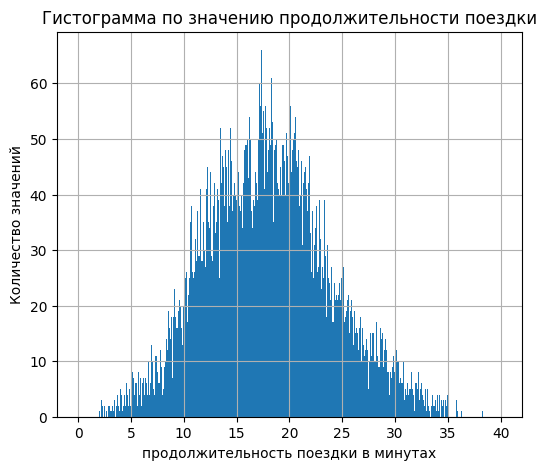

In [55]:
data_rides['duration'].hist(bins = 1000,range=(0,40),figsize=(6, 5)) #построим гистограмму по значениям `duration`
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению продолжительности поездки')
plt.xlabel('продолжительность поездки в минутах');

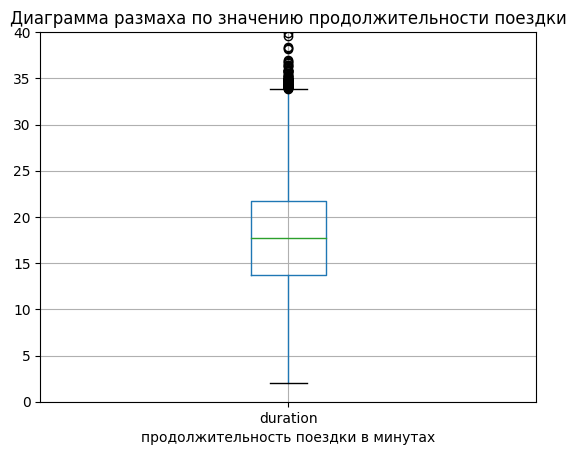

In [56]:
#построим диаграмму размаха
plt.ylim(0, 40)
data_rides.boxplot('duration')
plt.title('Диаграмма размаха по значению продолжительности поездки')
plt.xlabel('продолжительность поездки в минутах');

<div style="border:solid green 2px; padding: 20px">
Вывод: на третьем этапе были проанализированы данные о пользователях и поездках.
    
- Несмотря на определенную сопоставимость данных о количестве пользователей по большинству городов, Москва представлена в сервисе определенно реже. Причиной может быть тот факт, что в Москве достаточно и других сервисов аренды самокатов.
- Несмотря на преимущества, которые дает подписка, людей без подписки больше.
- Чаще всего сервисом пользуются люди возрастом 22-28 лет.
- Предполагается наличие технических багов в данных. Невозможно проехать большие расстояния за 30 секунд. Вероятнее всего, пользователь окончил поездку и поехал дальше, при этом колеса не блокируются и это необходимо решить. Данные значения для дальнейших исследований были отброшены. В реальном случае можно было бы связаться со специалистами сервиса и задать вопрос о баге.
- Расстояние, которое чаще всего преодолевается при помощи самоката составляет 2,5-3,7 км.
- Время на поездку в большинстве случаев составляет 13-22 мин.

## Шаг. Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [57]:
#объединим данные двух датафреймов `data_rides` и `data_users`
data_users_rides_sub = data_rides.merge(data_users, on = 'user_id')
data_users_rides_sub = data_users_rides_sub.merge(data_sub, on = 'subscription_type')

#выведем новый датафрейм на экран (первые 5 строк)
display(data_users_rides_sub.head())

,user_id,distance,duration,date,month,speed_km_in_hour,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,10.335841,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,9.929620,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,7.260713,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,8.734644,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,9.202888,Кира,22,Тюмень,ultra,6,0,199


In [58]:
#проверим пробелы в новом датафрейме
data_users_rides_sub.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
speed_km_in_hour     0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [59]:
data_users_rides_sub.info() #выведем информацию о новом датафрейме на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int32         
 5   speed_km_in_hour   17973 non-null  float64       
 6   name               17973 non-null  object        
 7   age                17973 non-null  int64         
 8   city               17973 non-null  object        
 9   subscription_type  17973 non-null  object        
 10  minute_price       17973 non-null  int64         
 11  start_ride_price   17973 non-null  int64         
 12  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(

### Создание ещё двух датафреймов (с подпиской и без)

In [60]:
#создание нового датафрейма `data_no_sub` (перечень поездок без подписки)
data_no_sub = data_users_rides_sub.query('subscription_type=="free"')

#вывод на экран информации о датафрейме `data_no_sub`
data_no_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11473 entries, 6500 to 17972
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11473 non-null  int64         
 1   distance           11473 non-null  float64       
 2   duration           11473 non-null  float64       
 3   date               11473 non-null  datetime64[ns]
 4   month              11473 non-null  int32         
 5   speed_km_in_hour   11473 non-null  float64       
 6   name               11473 non-null  object        
 7   age                11473 non-null  int64         
 8   city               11473 non-null  object        
 9   subscription_type  11473 non-null  object        
 10  minute_price       11473 non-null  int64         
 11  start_ride_price   11473 non-null  int64         
 12  subscription_fee   11473 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(3)

In [61]:
#создание нового датафрейма `data_no_sub` (перечень поездок c подпиской)
data_with_sub = data_users_rides_sub.query('subscription_type=="ultra"')

#вывод на экран информации о датафрейме `data_no_sub`
data_with_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int32         
 5   speed_km_in_hour   6500 non-null   float64       
 6   name               6500 non-null   object        
 7   age                6500 non-null   int64         
 8   city               6500 non-null   object        
 9   subscription_type  6500 non-null   object        
 10  minute_price       6500 non-null   int64         
 11  start_ride_price   6500 non-null   int64         
 12  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(3)
memo

### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

#### Визуализация информации о расстоянии и времени поездок (категория `free`)

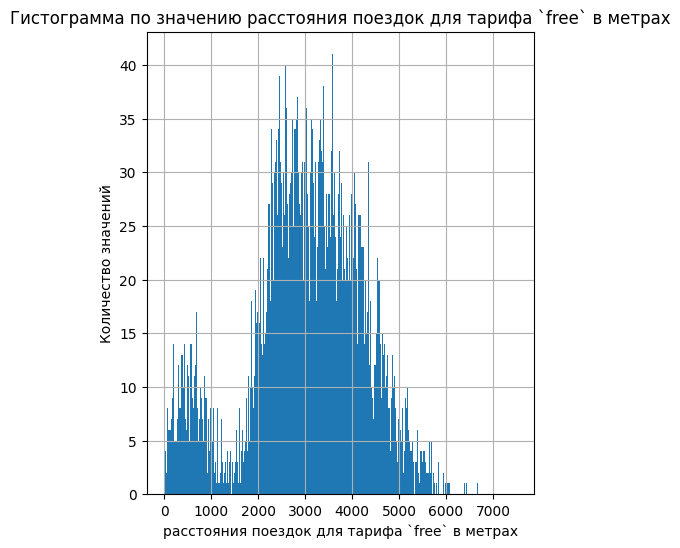

In [62]:
#построим гистограмму по значениям `distance`
data_no_sub['distance'].hist(bins = 1000,range=(0,7500),figsize=(5, 6)) 
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению расстояния поездок для тарифа `free` в метрах')
plt.xlabel('расстояния поездок для тарифа `free` в метрах');

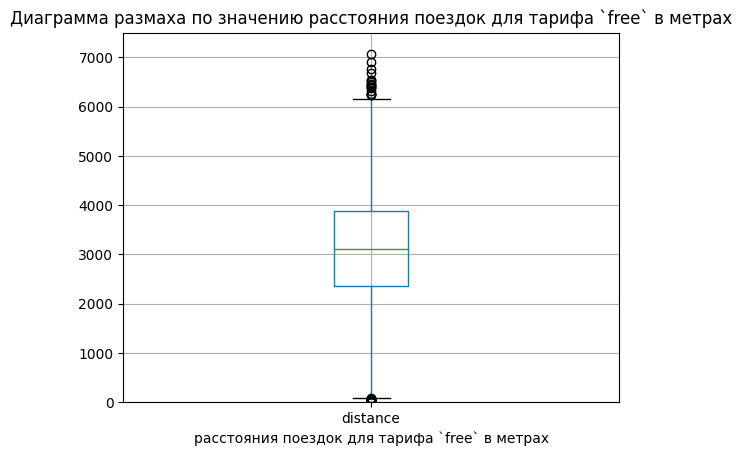

In [63]:
#построим диаграмму размаха
plt.ylim(0, 7500)
data_no_sub.boxplot('distance')
plt.title('Диаграмма размаха по значению расстояния поездок для тарифа `free` в метрах')
plt.xlabel('расстояния поездок для тарифа `free` в метрах');

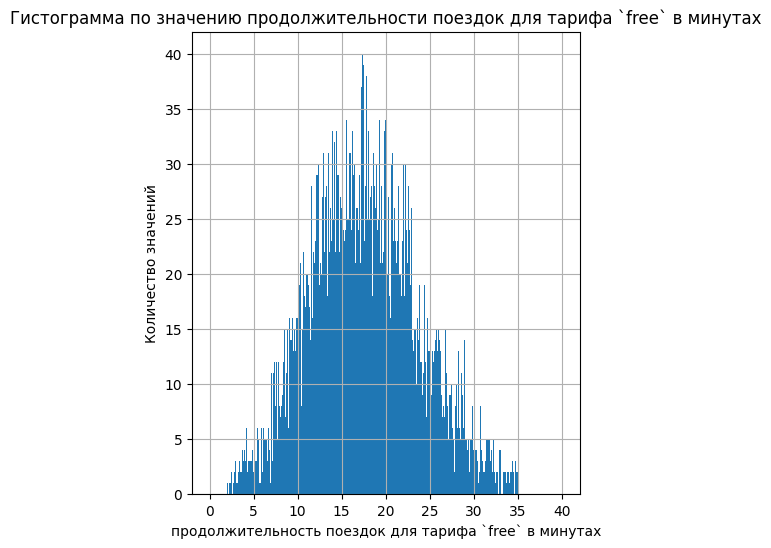

In [64]:
#построим гистограмму по значениям `duration`
data_no_sub['duration'].hist(bins = 1000,range=(0,40),figsize=(5, 6)) 
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению продолжительности поездок для тарифа `free` в минутах')
plt.xlabel('продолжительность поездок для тарифа `free` в минутах');

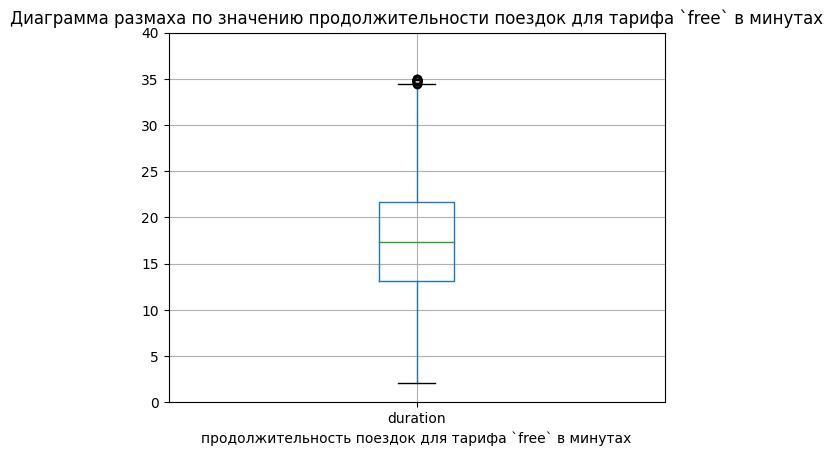

In [65]:
#построим диаграмму размаха
plt.ylim(0, 40)
data_no_sub.boxplot('duration')
plt.title('Диаграмма размаха по значению продолжительности поездок для тарифа `free` в минутах')
plt.xlabel('продолжительность поездок для тарифа `free` в минутах');

#### Визуализация информации о расстоянии и времени поездок (категория `ultra`)

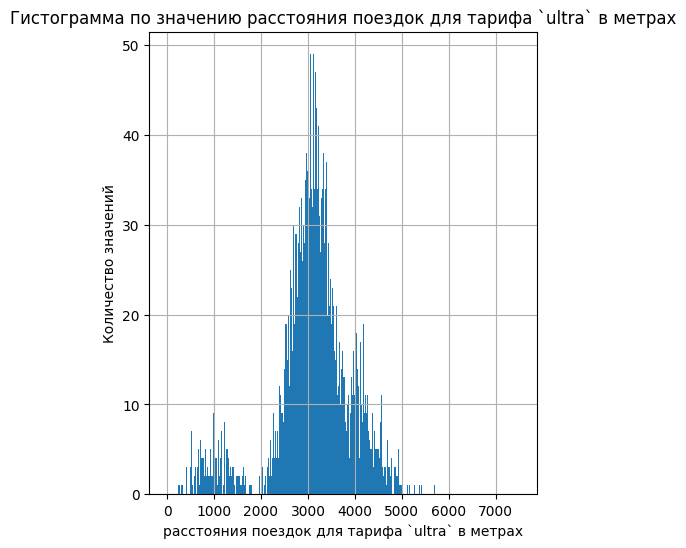

In [66]:
#построим гистограмму по значениям `distance`
data_with_sub['distance'].hist(bins = 1000,range=(0,7500),figsize=(5, 6)) 
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению расстояния поездок для тарифа `ultra` в метрах')
plt.xlabel('расстояния поездок для тарифа `ultra` в метрах');

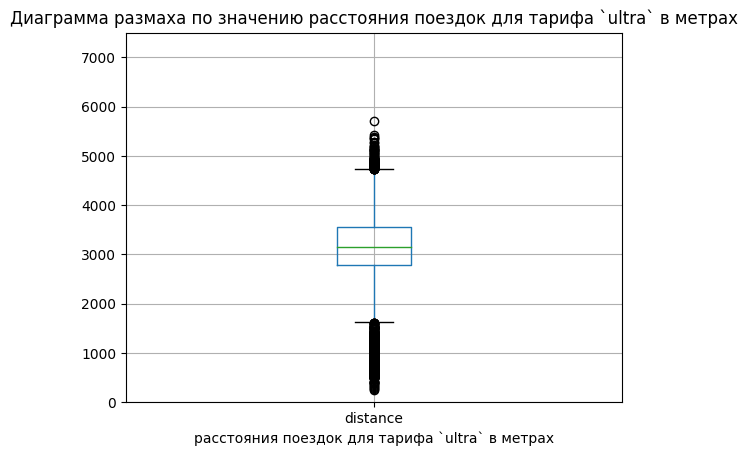

In [67]:
#построим диаграмму размаха
plt.ylim(0, 7500)
data_with_sub.boxplot('distance')
plt.title('Диаграмма размаха по значению расстояния поездок для тарифа `ultra` в метрах')
plt.xlabel('расстояния поездок для тарифа `ultra` в метрах');

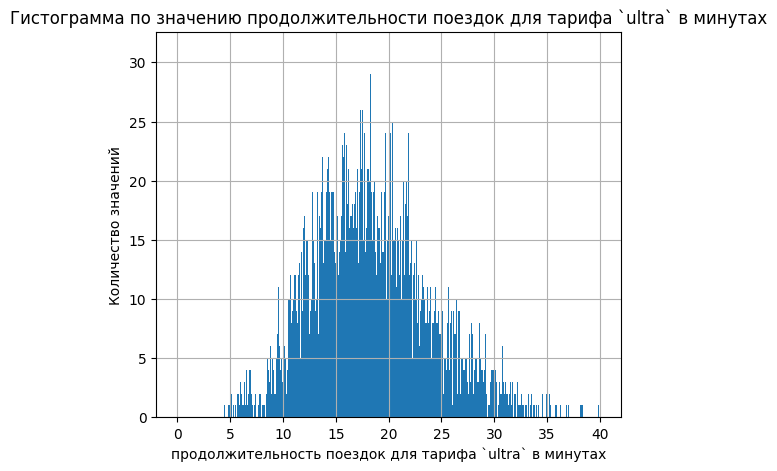

In [68]:
#построим гистограмму по значениям `duration`
data_with_sub['duration'].hist(bins = 1000,range=(0,40),figsize=(6, 5)) 
plt.ylabel('Количество значений')
plt.title('Гистограмма по значению продолжительности поездок для тарифа `ultra` в минутах')
plt.xlabel('продолжительность поездок для тарифа `ultra` в минутах');

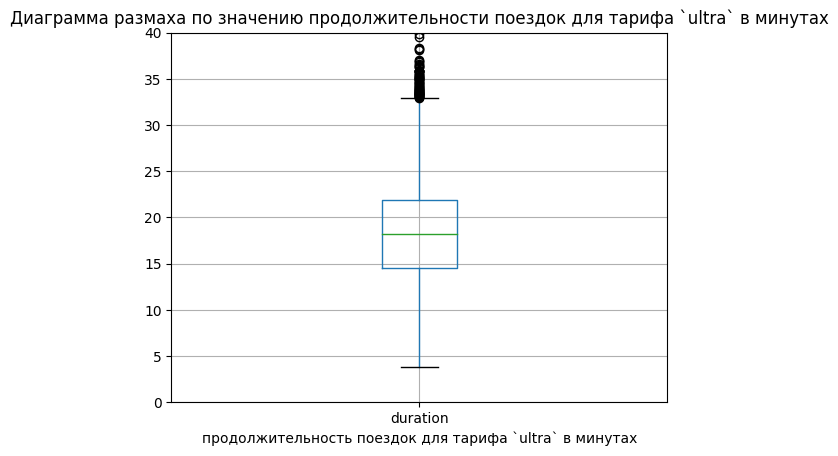

In [69]:
#построим диаграмму размаха
plt.ylim(0, 40)
data_with_sub.boxplot('duration')
plt.title('Диаграмма размаха по значению продолжительности поездок для тарифа `ultra` в минутах')
plt.xlabel('продолжительность поездок для тарифа `ultra` в минутах');

Объединим два распределения для наглядности на одном графике.

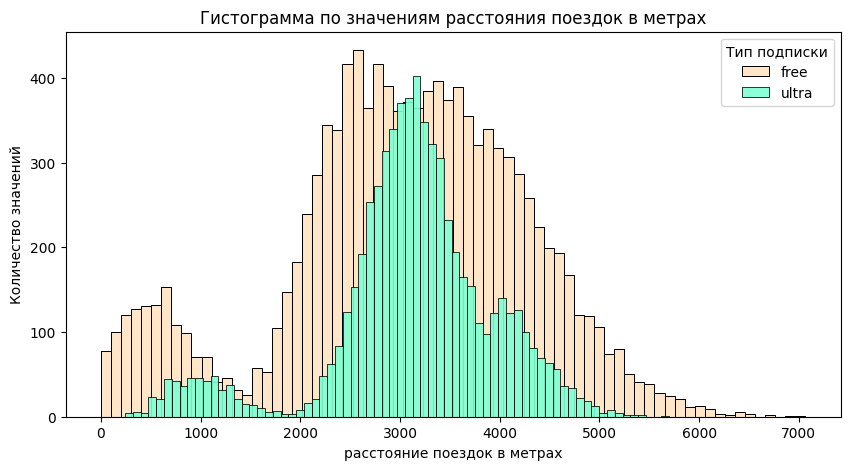

In [70]:
plt.figure(figsize=(10, 5))
sns.histplot(data_no_sub['distance'], bins=70, color='bisque', alpha=0.9, label='free')
sns.histplot(data_with_sub['distance'], bins=70, color='aquamarine', alpha=0.9, label='ultra')
plt.legend(title='Тип подписки')
plt.xlabel('расстояние поездок в метрах')
plt.ylabel('Количество значений')
plt.title('Гистограмма по значениям расстояния поездок в метрах');

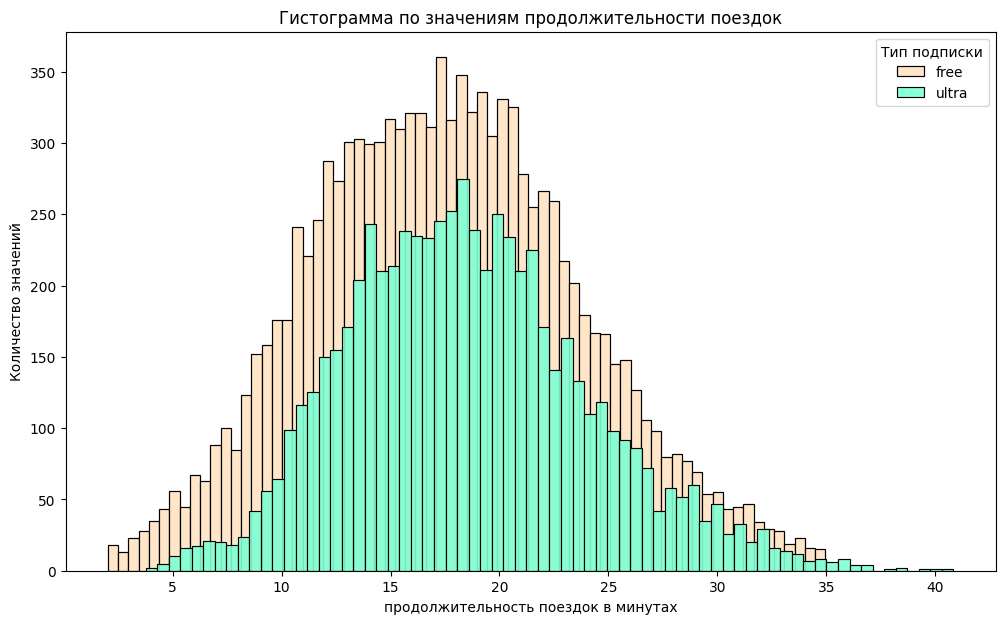

In [71]:
plt.figure(figsize=(12, 7))
sns.histplot(data_no_sub['duration'], bins=70, color='bisque', alpha=0.9, label='free')
sns.histplot(data_with_sub['duration'], bins=70, color='aquamarine', alpha=0.9, label='ultra')
plt.legend(title='Тип подписки')
plt.xlabel('продолжительность поездок в минутах')
plt.ylabel('Количество значений')
plt.title('Гистограмма по значениям продолжительности поездок');

<div style="border:solid green 2px; padding: 20px">
Вывод: на четвертом этапе были объединены данные двух датафреймов `data_rides` и `data_users`. Были созданы два новых датафрейма `data_no_sub` (перечень поездок без подписки) и `data_with_sub` (перечень поездок с подпиской). Основной объем поездок лежит для категории `free` в диапазоне 2.2-3.9 км. Основной диапазон времени поездок для категории `free` - 13-22 минуты. Основной объем поездок лежит для категории `ultra` в диапазоне 2.8-3.5 км. В двух тарифах в отношении в разрезе расстояния поездок наблюдаются два пика на гистограммах (короткие и длиные расстояния). Пик для тарифа 'free` в отношении коротких расстояний составляет около 500 метров, для тарифа `ultra` - около 1 км. Пик для тарифа `free` в отношении длинных расстояний составляет около 2.5 км, а для тарифа `ultra` - 3.2 км. Разброс значение для параметров `duration` и `distance` для тарифа `ultra` меньше.

## Шаг. Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках

In [72]:
# каждое значение из столбца duration округляется с помощью «потолка»: 
data_users_rides_sub['duration'] = np.ceil(data_users_rides_sub['duration'])

In [73]:
#создадим сводную таблицу с агрегированными данными о поездках
data_revenue = pd.pivot_table(data_users_rides_sub,
               index=["user_id", "month"],
               values=["distance", "name", "duration", "subscription_type", "minute_price",\
                       "start_ride_price", "subscription_fee"],
               aggfunc={"distance": np.sum, "name": 'count', "duration":np.sum, "subscription_type":'first', "minute_price":\
                       'first', "start_ride_price": 'first', "subscription_fee": 'first'},
               fill_value=0)

#переименуем столбцы
data_revenue.columns = ['sum_distance', 'sum_duration', 'minute_price', 'count_rides', 'start_ride_price',\
                        'subscription_fee', 'subscription_type']

#выведем таблицу
data_revenue

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_12492\3166976170.py:2: FutureWarning: The provided callable <function sum at 0x000001CD7FC1CCA0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_revenue = pd.pivot_table(data_users_rides_sub,


sum_distance  sum_duration  minute_price  count_rides  \
user_id month                                                          
1       1       7027.511294          42.0             6            2   
        4        754.159807           7.0             6            1   
        8       6723.470560          46.0             6            2   
        10      5809.911100          32.0             6            2   
        11      7003.499363          56.0             6            3   
...                     ...           ...           ...          ...   
1534    6       3409.468534          26.0             8            2   
        8       7622.453034          48.0             8            2   
        9       4928.173852          23.0             8            1   
        11     13350.015305          78.0             8            4   
        12      2371.711192          16.0             8            1   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
...                         ...               ...               ...  
1534    6                    50                 0              free  
        8                    50                 0              free  
        9                    50                 0              free  
        11                   50                 0              free  
        12                   50                 0              free  

[11300 rows x 7 columns]

### Добавление информации с помесячной выручкой

In [74]:
data_revenue['month_revenue'] = data_revenue['count_rides']*data_revenue['start_ride_price']\
+data_revenue['subscription_fee']+data_revenue['sum_duration']*data_revenue['minute_price']

In [75]:
data_revenue #вывод сводоной таблицы  данными по ежемесячной выручке

sum_distance  sum_duration  minute_price  count_rides  \
user_id month                                                          
1       1       7027.511294          42.0             6            2   
        4        754.159807           7.0             6            1   
        8       6723.470560          46.0             6            2   
        10      5809.911100          32.0             6            2   
        11      7003.499363          56.0             6            3   
...                     ...           ...           ...          ...   
1534    6       3409.468534          26.0             8            2   
        8       7622.453034          48.0             8            2   
        9       4928.173852          23.0             8            1   
        11     13350.015305          78.0             8            4   
        12      2371.711192          16.0             8            1   

               start_ride_price  subscription_fee subscription_type  \
user_id month                                                         
1       1                     0               199             ultra   
        4                     0               199             ultra   
        8                     0               199             ultra   
        10                    0               199             ultra   
        11                    0               199             ultra   
...                         ...               ...               ...   
1534    6                    50                 0              free   
        8                    50                 0              free   
        9                    50                 0              free   
        11                   50                 0              free   
        12                   50                 0              free   

               month_revenue  
user_id month                 
1       1              451.0  
        4              241.0  
        8              475.0  
        10             391.0  
        11             535.0  
...                      ...  
1534    6              308.0  
        8              484.0  
        9              234.0  
        11             824.0  
        12             178.0  

[11300 rows x 8 columns]

<div style="border:solid green 2px; padding: 20px">
    Вывод: на пятом этапе данные `duration` были округлены к верхнему значению. Создана сводная таблица с агрегированными данными о поездках. Добавлены данные из столбцов таблицы `data_sub` об условиях тарифов `free` и `ultra`. Также была рассчитана помесячная выручка для каждого пользователя.

## Шаг. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Необходимо проверить данную гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Н<sub>0</sub> - гипотеза о том, что пользователи с подпиской тратят сопоставимое время на поездки с пользователями без подписки

H<sub>1</sub> - гипотеза о том, что пользователи с подпиской тратят больше времени на поездки

Есть стандартные уровни значимости 0,1; 0,05; 0,01; 0,001.

И условно их можно выбирать так. Если объем выборки небольшой до 100 единиц, то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05 или даже 0,1. При объеме выборки, измеряемой сотнями – от 100 до 1000, следует понизить уровень значимости хотя бы до 0,01. А при больших выборках, измеряемых тысячами наблюдений, уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001.

α примем 0,001

In [76]:
alpha = 0.001 # задаем уровень статистической значимости

# проведем статистический тест о превышении времени поездки с подпиской времени без подписки
results = st.ttest_ind(data_with_sub['duration'], data_no_sub['duration'], equal_var=False, alternative='greater')

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha : # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.6162210195310587e-29
Отвергаем нулевую гипотезу


### Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Необходимо проверить утверждение, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Н<sub>0</sub> - гипотеза: среднее расстояние в поездке равно 3130 метров

H<sub>1</sub> - гипотеза: среднее расстояние в поездке более 3130 метров

α примем 0,001

In [77]:
interested_value = 3130 # оптимальное расстояние одной поездки

alpha = 0.001 # укажите уровень статистической значимости

# используем метод st.ttest_1samp
results = st.ttest_1samp(data_with_sub['distance'], interested_value, alternative='greater') 

print('p-значение:', results.pvalue) # добавьте в аргумент p-value

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 3

Необходимо проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Н<sub>0</sub> - гипотеза: помесячная выручка от пользователей с подпиской по месяцам сопоставима с выручкой от пользователей без подписки

H<sub>1</sub> - гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

α примем 0,001

In [78]:
alpha = 0.001 # задаем уровень статистической значимости

# проведем статистический тест о превышении помесячной выручки в тарифе `ultra` над ттарифом `free`
results = st.ttest_ind(data_revenue.loc[data_revenue['subscription_type']=="ultra",'month_revenue'],\
                       data_revenue.loc[data_revenue['subscription_type']=="free",'month_revenue'],\
                       equal_var=False, alternative='greater')

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha : # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4970242872858465e-38
Отвергаем нулевую гипотезу


### Вопрос по предложенной ситуации

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ: в данном случае у нас есть генеральная совокупность до и после изменения. При наличии двух зависимых (парных) выборок лучше использовать `scipy.stats.ttest_rel`**

<div style="border:solid green 2px; padding: 20px">
Вывод: на шестом этапе было проверено три гипотезы.    

- гипотеза 1: да, пользователи с подпиской тратят больше времени на поездки.
- гипотеза 2: не удалось отвергнуть гипотезу, что пользователи с подпиской преодолевают за одну поездку расстояние сопоставимое с 3130 метрами
- гипотеза 3: гипотеза о том, что помесячна выручка в тарифе `ultra` выше, чем в тарифе `free` подтверждена.
    
Также был дан ответ на вопрос о применении t-test для генеральной совокупности до и после изменения. Это `scipy.stats.ttest_rel`


## Шаг. Распределения

### Задание 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

Функция st.binom.cdf() вычисляет CDF для биномиального распределения. В этом случае функция кумулятивного распределения возвращает вероятность того, что максимум 99 клиентов продлят подписку.

Минимальное количество промокодов составляет: 1161


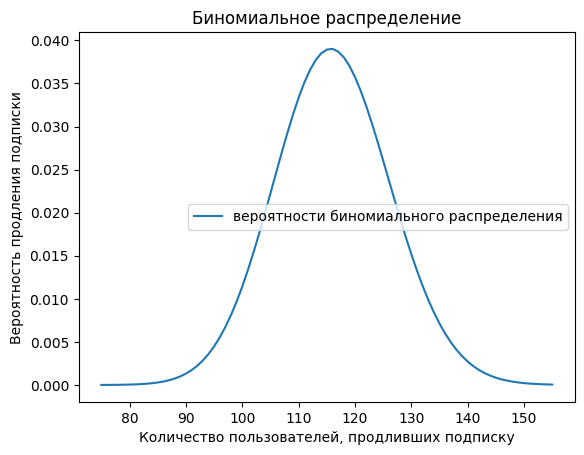

In [79]:
n = 0 # начальное значение n
p = 0.1 # вероятность подписки
k = 99 #значение для неудачи

while 0.05<binom.cdf(k,n,p):
    n+=1 
print('Минимальное количество промокодов составляет:',n)

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))

# рисуем график биномиального распределения
ax = plt.subplot()

# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), ms=5, label='вероятности биномиального распределения')

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.title('Биномиальное распределение')
plt.xlabel('Количество пользователей, продливших подписку')
plt.ylabel('Вероятность продления подписки')
plt.show()


### Задание 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. Необходимо оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность составляет: 15.37%


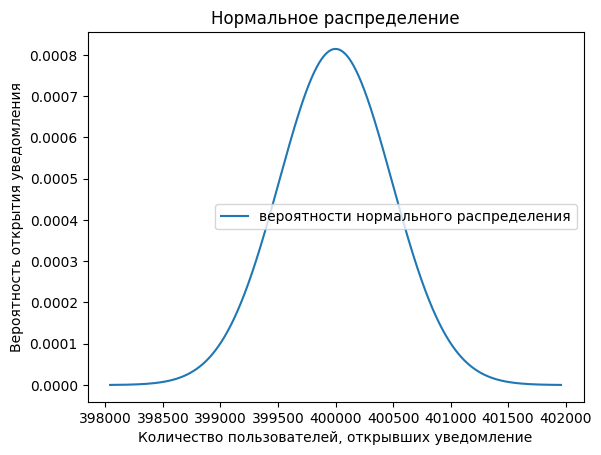

In [80]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5
result = distr.cdf(399500)
print('Вероятность составляет:',"{:.2%}".format(result))

# рисуем график нормального распределения:
# значения между 0 and 1000000 с шагом 1
x_axis = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(x_axis, norm.pdf(x_axis,mu,sigma),label='вероятности нормального распределения')
plt.legend(loc='best')
plt.title('Нормальное распределение')
plt.xlabel('Количество пользователей, открывших уведомление')
plt.ylabel('Вероятность открытия уведомления')
plt.show()

<div style="border:solid green 2px; padding: 20px">
Вывод: на седьмом этапе были рассчитаны значения параметров для отдела маркетинга  GoFast.   

- Минимальное значение промокодов на один бесплатный месяц подписки, которое необходимо разослать, при котором как минимум 100 существующих клиентов должны продлить эту подписку - 1161
- Вероятность того, что пуш-уведомление откроют не более 399,5 тыс. пользователей составляет 15,37%.

## Итоговый вывод

<div style="border:solid green 2px; padding: 20px">
Вывод:

1. На первом этапе работы были считаны файлы с данными с помощью библиотеки `pandas` и сохранены в датафреймы. Были выведены первые строки каждого датафрейма (пользователи, поездки и подписки).
    
    
2. На втором этапе данные столбца `date` в датафрейме о поездках (`data_rides`) были приведены к типу даты pandas. В этом же датафрейме был создан новый столбец `month` с данными о номере месяца. Было проверено наличие/отсутствие пропусков и дубликатов. Из датафрейма о пользователях (`data_users`) был удален 31 дубликат. Не наблюдается сильного различия о количестве поездок по месяцам, что для России странно. Если бы это был реальный проект с данными по России, то необходимо было уточнять правильность данных.
    
    
3. На третьем этапе была описана и визуализирована общая информация о пользователях и поездках:
    
  - частота встречаемости городов;  
  - соотношение пользователей с подпиской и без подписки;  
  - возраст пользователей;
  - расстояние, которое пользователь преодолел за одну поездку;
  - продолжительность поездок.
    
Серьезной разницы в частоте встречаемости городов отмечено не было. Но больше всего пользователей отмечено в Пятигорске (219 человек), а меньше всего – в Москве (168 человек).
Пользователей без подписки больше, чем с подпиской (835 против 699 соответственно).
Люди в возрасте 25 лет чаще всего пользуются самокатами. Настораживает наличие пользователей младше 18 лет. Если это электросамокаты, то пользоваться самостоятельно ими можно только с 18 лет. А учитывая, что, вероятнее всего, к сервису подключена дебетовая карта родителя, то отсутствие реакции со стороны сервиса выглядит странно и безответственно, учитывая ужесточение законодательства в РФ в отношении передвижения на электросамокатах. Это серьезно может навредить имиджу сервиса. Опять же, если бы это был реальный проект, на это необходимо было бы обратить внимание представителей сервиса.
Обнаружены странные показатели в составе данных о расстоянии, которое пользователей преодолел за одну поездку. За 30 секунд люди достигали скорости, сравнимой с среднестатистическим самолетом. Возникло предположение, что значение продолжительности таких поездок может быть данными в часах, но учитывая соотношение показателей с общим объемом данных (0,5%), проще было их удалить.
В большинстве случаев время одной поездки составляет 13-22 минуты.
    
4. На четвертом этапе данные о пользователях, поездках и подписках были объединены в один датафрейм. Для этого был использован метод merge(). Были созданы два отдельных датафрейма (данные о пользователях с подпиской и без). Были визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий. Основной объем поездок лежит для категории `free` в диапазоне 2.2-3.9 км. Основной диапазон времени поездок для категории `free` - 13-22 минуты. Основной объем поездок лежит для категории `ultra` в диапазоне 2.8-3.5 км. Основной диапазон времени поездок для категории `ultra` - 14-22 минуты. В двух тарифах в отношении в разрезе расстояния поездок наблюдаются два пика на гистограммах (короткие и длиные расстояния). Пик для тарифа `free` в отношении коротких расстояний составляет около 500 метров, для тарифа `ultra` - около 1 км. Пик для тарифа `free` в отношении длинных расстояний составляет около 2.5 км, а для тарифа `ultra` - 3.2 км.
    
    
5. На пятом этапе был произведен подсчет выручки. Данные столбца `duration` (продолжительность каждой поездки) были округлены до верхнего значения. Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Был добавлен столбец с помесячной выручкой для каждого пользователя.
    
    
6. На шестом этапе были проверены три гипотезы:
  - гипотеза №1: необходимо понять, тратят ли пользователи с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Гипотеза подтвердилась.
  - гипотеза №2: расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Необходимо проверить, чтобы среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышало 3130 метров. В противном случае это может говорить о ускоренном износе парка. Гипотезу отвергнуть не удалось. Вероятнее всего, среднее расстояние одной поездки сопоставимо 3130 метров.
  - гипотеза №3: необходимо проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Гипотеза подтвердилась.
    
Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Тест, который необходимо использовать `scipy.stats.ttest_rel`.
    
    
7. На седьмом этапе было поставлено две задачи:
    
 - задача №1: отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Установлено, что необходимо разослать как минимум 1161 промокодов.
  - задача №2: Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации необходимо оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей. Установлено, что вероятность составляет 15,37%.
    
**Соответственно, учитывая полученные результаты проверки гипотез, необходимо сосредоточится на увеличении количества пользователей с подпиской. Но необходимо обратить внимание, что у пользователей с подпиской расстояние одной поездки равно 3130 метров. Таким образом, нужно проанализировать не повлечет ли увеличение пользователей с подпиской увеличение расходов на ремонт и приобретение самокатов. Необходимо, чтобы выручка от пользователей с подпиской была выше совокупных расходов на данную группу пользователей**
